In [13]:
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sys.path.append(os.path.abspath('../scripts'))

In [14]:
from Overview_Analysis import load_data_using_sqlalchemy, calculate_missing_percentage, impute_numerical_columns, drop_columns_with_missing_values

In [15]:
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")
    
df.sample(7)

Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
35120,1.311448e+19,4/25/2019 6:46,20.0,4/26/2019 6:54,573.0,86908.0,2.082003e+14,3.361835e+10,3.584921e+13,L85707A,...,7836238.0,666115.0,5422220.0,21462959.0,410783063.0,3550916.0,513093140.0,10735989.0,41003857.0,426765338.0
118237,7.349883e+18,4/28/2019 6:36,309.0,4/30/2019 6:11,350.0,171303.0,2.082009e+14,3.366335e+10,3.563011e+13,T50972B,...,17666299.0,19438015.0,6105624.0,191713.0,824738845.0,15983375.0,329633658.0,760491.0,38880107.0,855540301.0
141768,7.277826e+18,4/24/2019 1:56,170.0,4/25/2019 1:56,159.0,86398.0,2.082017e+14,3.366051e+10,8.637690e+13,T77471B,...,5365758.0,5469139.0,8514360.0,5287921.0,99732972.0,730204.0,715912070.0,242680.0,13956276.0,123095966.0
68190,7.277826e+18,4/27/2019 3:21,657.0,4/28/2019 3:21,903.0,86399.0,2.082003e+14,3.366099e+10,3.538161e+13,CELL_208_20_501487_6,...,17835947.0,18376030.0,10566850.0,7448376.0,611900702.0,1058457.0,788402946.0,12650576.0,42612601.0,651829503.0
142236,7.277826e+18,4/24/2019 2:27,822.0,4/25/2019 2:27,809.0,86399.0,2.082010e+14,3.365043e+10,8.637690e+13,L78134C,...,12157647.0,20979279.0,5374392.0,2883606.0,678731263.0,3402742.0,525627141.0,11770525.0,40415743.0,700326756.0
67220,1.304243e+19,4/27/2019 1:54,676.0,4/28/2019 1:54,546.0,86399.0,2.082018e+14,3.366716e+10,8.637690e+13,D85707C,...,19180041.0,11035004.0,1226283.0,17170949.0,618344295.0,10754572.0,247394515.0,6782026.0,50473390.0,644463907.0
88229,1.304243e+19,4/27/2019 17:05,446.0,4/28/2019 0:27,303.0,26542.0,2.082015e+14,3.368029e+10,3.566761e+13,T41491A,...,13091168.0,7842469.0,3764089.0,21325744.0,247451191.0,3628147.0,533016716.0,243524.0,35312389.0,277480999.0


In [16]:
calculate_missing_percentage(df)

,Missing Values,Percentage
Bearer Id,991,0.660662
Start,1,0.000667
Start ms,1,0.000667
End,1,0.000667
End ms,1,0.000667
Dur. (ms),1,0.000667
IMSI,570,0.379997
MSISDN/Number,1066,0.710662
IMEI,572,0.381331
Last Location Name,1153,0.768662


In [17]:
df = drop_columns_with_missing_values(df)

Columns dropped: 10


In [18]:
df = impute_numerical_columns(df)
df = df.dropna()

Imputed missing values in the following columns: ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']


In [19]:
# Step 2: Aggregate per customer
customer_aggregates = df.groupby('MSISDN/Number').agg({
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first'  # Assuming customers have one handset type
}).reset_index()

# Rename columns for clarity
customer_aggregates.rename(columns={
    'Avg RTT DL (ms)': 'Avg RTT DL',
    'Avg RTT UL (ms)': 'Avg RTT UL',
    'Avg Bearer TP DL (kbps)': 'Avg Throughput DL',
    'Avg Bearer TP UL (kbps)': 'Avg Throughput UL',
}, inplace=True)

customer_aggregates['Avg RTT'] = (customer_aggregates['Avg RTT DL'] + customer_aggregates['Avg RTT UL']) / 2
customer_aggregates['Avg Throughput'] = (customer_aggregates['Avg Throughput DL'] + customer_aggregates['Avg Throughput UL']) / 2

# Final result
customer_aggregates = customer_aggregates[['MSISDN/Number', 'Avg RTT', 'Avg Throughput', 'Handset Type']]
print(customer_aggregates.head())

   MSISDN/Number    Avg RTT  Avg Throughput                    Handset Type
0   3.360100e+10  23.000000            38.0  Huawei P20 Lite Huawei Nova 3E
1   3.360100e+10  15.500000            49.5          Apple iPhone 7 (A1778)
2   3.360100e+10  63.729294            48.5                       undefined
3   3.360101e+10  42.000000           124.0         Apple iPhone 5S (A1457)
4   3.360101e+10  29.750000         14211.0         Apple iPhone Se (A1723)


C:\Users\ephre\AppData\Local\Temp\ipykernel_22292\2065922702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DL TP < 50 Kbps (%)', y='MSISDN/Number', data=top_tcp, palette='Blues_d')


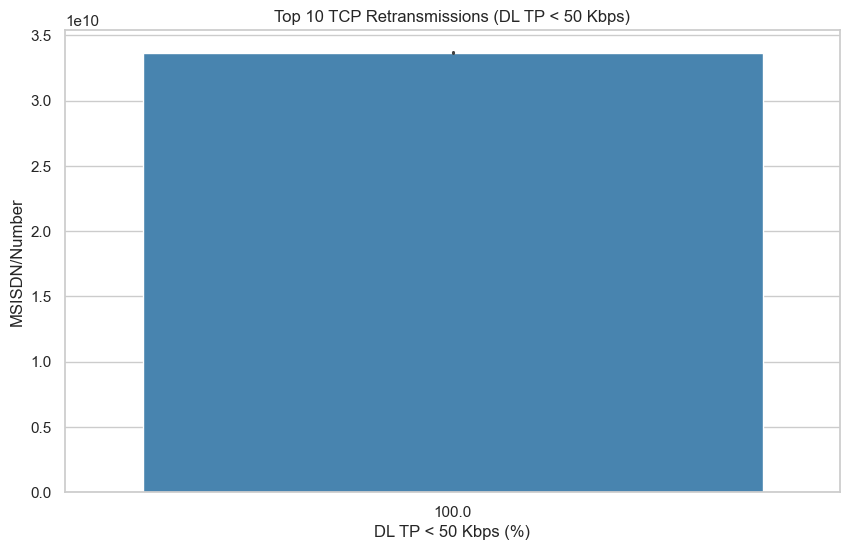

C:\Users\ephre\AppData\Local\Temp\ipykernel_22292\2065922702.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DL TP < 50 Kbps (%)', y='MSISDN/Number', data=bottom_tcp, palette='Reds_d')


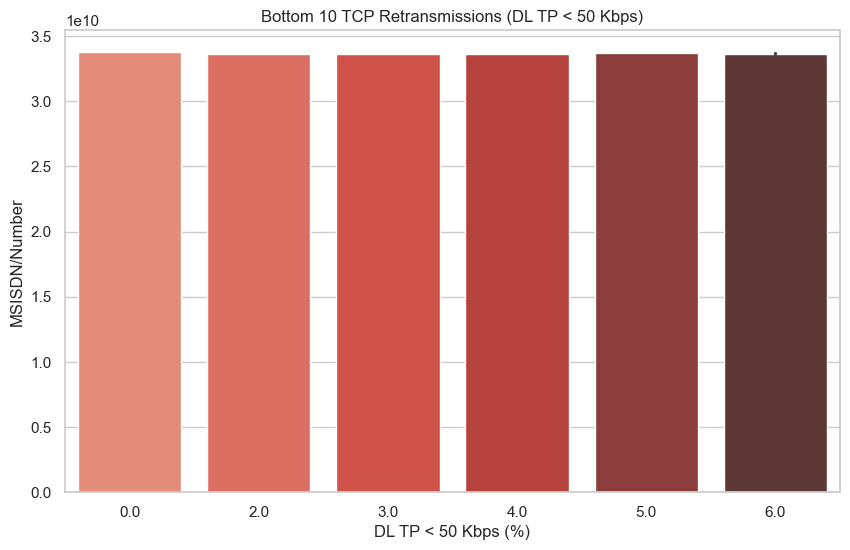

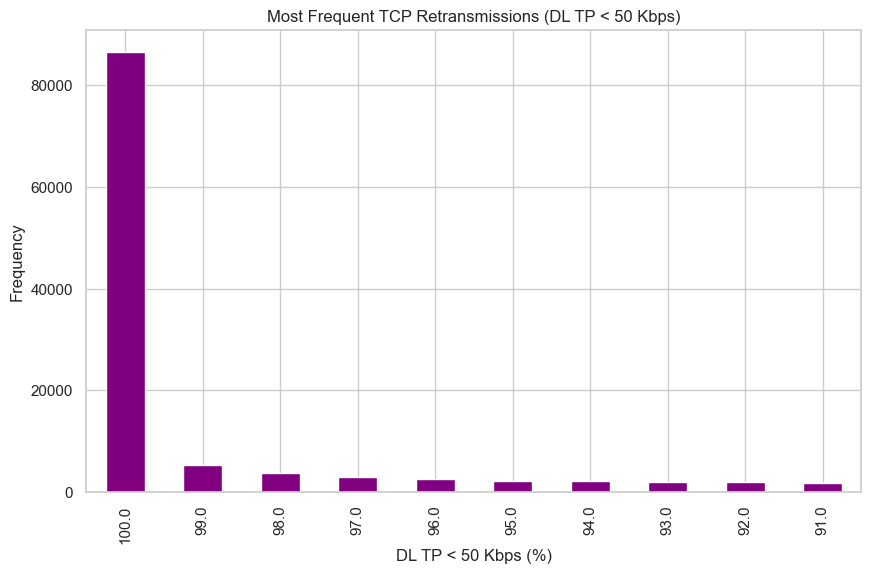

In [20]:
# Top 10 TCP retransmission (DL TP < 50 Kbps)
top_tcp = df.nlargest(10, 'DL TP < 50 Kbps (%)')
bottom_tcp = df.nsmallest(10, 'DL TP < 50 Kbps (%)')
most_frequent_tcp = df['DL TP < 50 Kbps (%)'].value_counts().head(10)

# Setting style for the plots
sns.set(style="whitegrid")

# TCP Retransmission Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x='DL TP < 50 Kbps (%)', y='MSISDN/Number', data=top_tcp, palette='Blues_d')
plt.title('Top 10 TCP Retransmissions (DL TP < 50 Kbps)')
plt.xlabel('DL TP < 50 Kbps (%)')
plt.ylabel('MSISDN/Number')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='DL TP < 50 Kbps (%)', y='MSISDN/Number', data=bottom_tcp, palette='Reds_d')
plt.title('Bottom 10 TCP Retransmissions (DL TP < 50 Kbps)')
plt.xlabel('DL TP < 50 Kbps (%)')
plt.ylabel('MSISDN/Number')
plt.show()

plt.figure(figsize=(10, 6))
most_frequent_tcp.plot(kind='bar', color='purple')
plt.title('Most Frequent TCP Retransmissions (DL TP < 50 Kbps)')
plt.xlabel('DL TP < 50 Kbps (%)')
plt.ylabel('Frequency')
plt.show()

C:\Users\ephre\AppData\Local\Temp\ipykernel_22292\3790103319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg RTT DL (ms)', y='MSISDN/Number', data=top_rtt, palette='Greens_d')


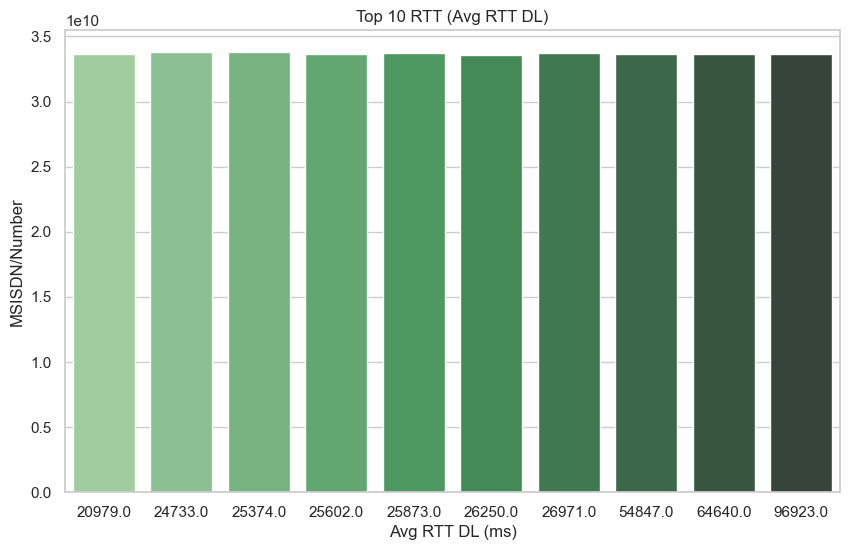

C:\Users\ephre\AppData\Local\Temp\ipykernel_22292\3790103319.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg RTT DL (ms)', y='MSISDN/Number', data=bottom_rtt, palette='Oranges_d')


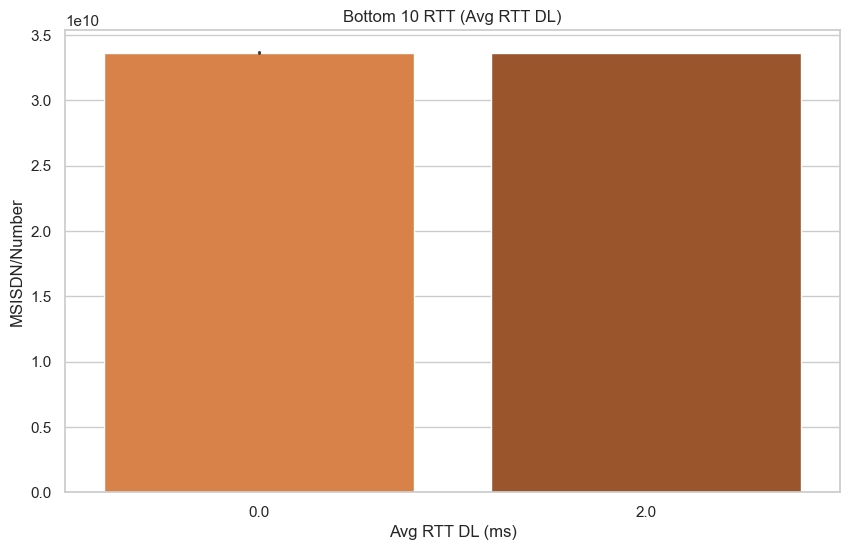

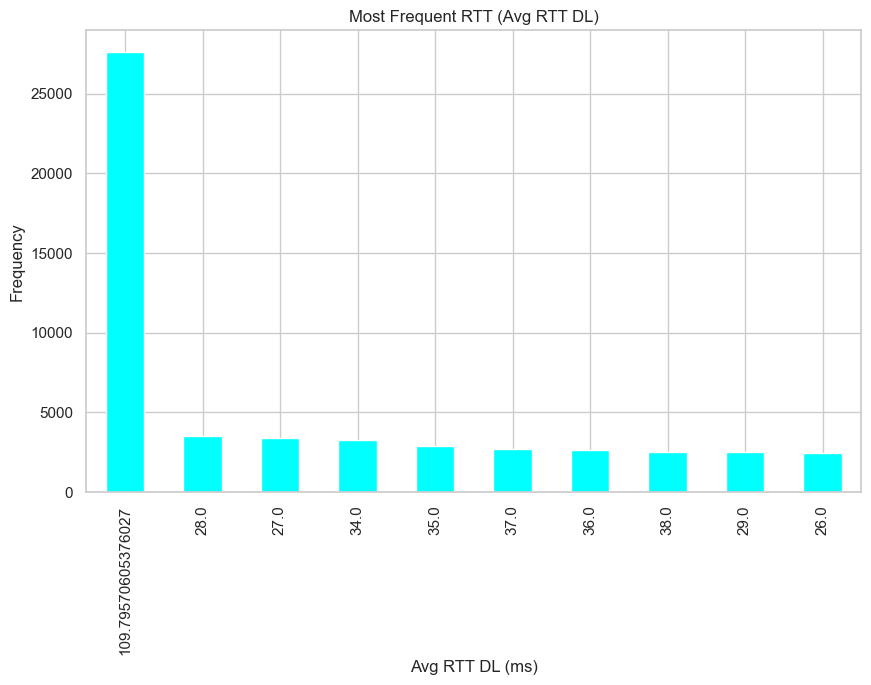

In [21]:
# Similarly for RTT and Throughput
top_rtt = df.nlargest(10, 'Avg RTT DL (ms)')
bottom_rtt = df.nsmallest(10, 'Avg RTT DL (ms)')
most_frequent_rtt = df['Avg RTT DL (ms)'].value_counts().head(10)

# RTT Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x='Avg RTT DL (ms)', y='MSISDN/Number', data=top_rtt, palette='Greens_d')
plt.title('Top 10 RTT (Avg RTT DL)')
plt.xlabel('Avg RTT DL (ms)')
plt.ylabel('MSISDN/Number')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg RTT DL (ms)', y='MSISDN/Number', data=bottom_rtt, palette='Oranges_d')
plt.title('Bottom 10 RTT (Avg RTT DL)')
plt.xlabel('Avg RTT DL (ms)')
plt.ylabel('MSISDN/Number')
plt.show()

plt.figure(figsize=(10, 6))
most_frequent_rtt.plot(kind='bar', color='cyan')
plt.title('Most Frequent RTT (Avg RTT DL)')
plt.xlabel('Avg RTT DL (ms)')
plt.ylabel('Frequency')
plt.show()

C:\Users\ephre\AppData\Local\Temp\ipykernel_22292\1905029791.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=top_throughput, palette='Purples_d')


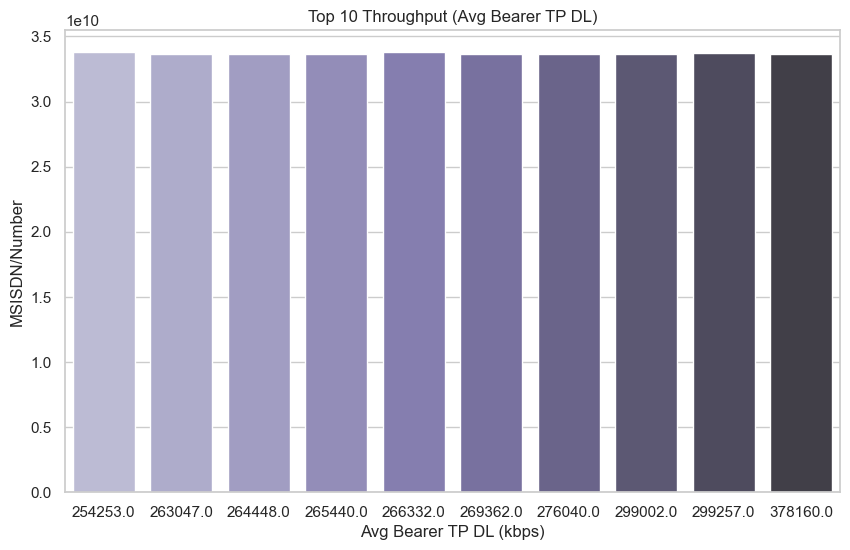

C:\Users\ephre\AppData\Local\Temp\ipykernel_22292\1905029791.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=bottom_throughput, palette='Reds_d')


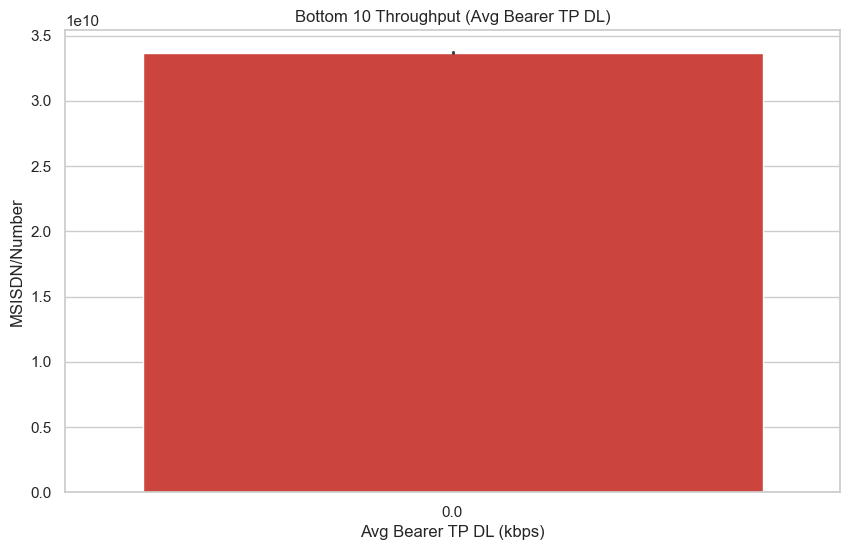

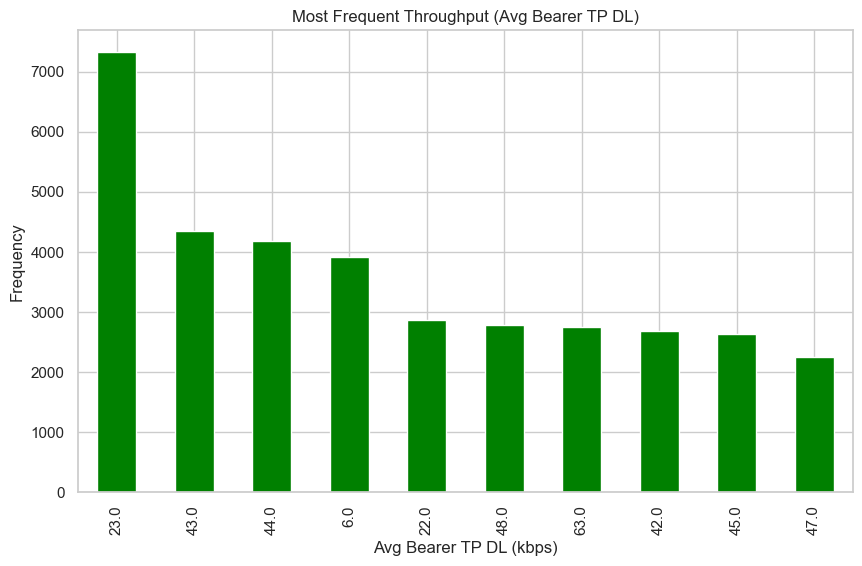

In [22]:
# Throughput
top_throughput = df.nlargest(10, 'Avg Bearer TP DL (kbps)')
bottom_throughput = df.nsmallest(10, 'Avg Bearer TP DL (kbps)')
most_frequent_throughput = df['Avg Bearer TP DL (kbps)'].value_counts().head(10)

# Throughput Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=top_throughput, palette='Purples_d')
plt.title('Top 10 Throughput (Avg Bearer TP DL)')
plt.xlabel('Avg Bearer TP DL (kbps)')
plt.ylabel('MSISDN/Number')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=bottom_throughput, palette='Reds_d')
plt.title('Bottom 10 Throughput (Avg Bearer TP DL)')
plt.xlabel('Avg Bearer TP DL (kbps)')
plt.ylabel('MSISDN/Number')
plt.show()

plt.figure(figsize=(10, 6))
most_frequent_throughput.plot(kind='bar', color='green')
plt.title('Most Frequent Throughput (Avg Bearer TP DL)')
plt.xlabel('Avg Bearer TP DL (kbps)')
plt.ylabel('Frequency')
plt.show()


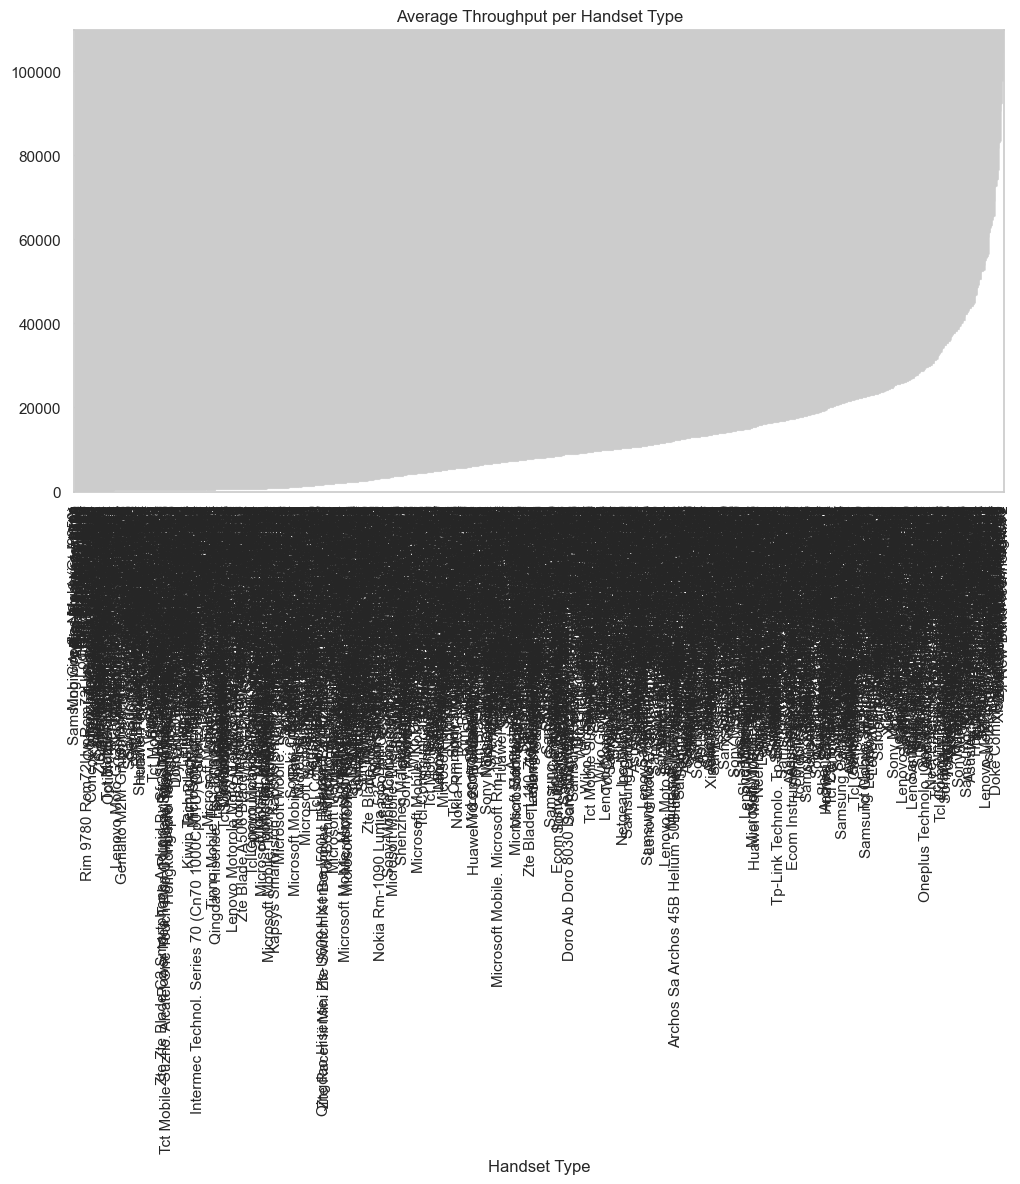

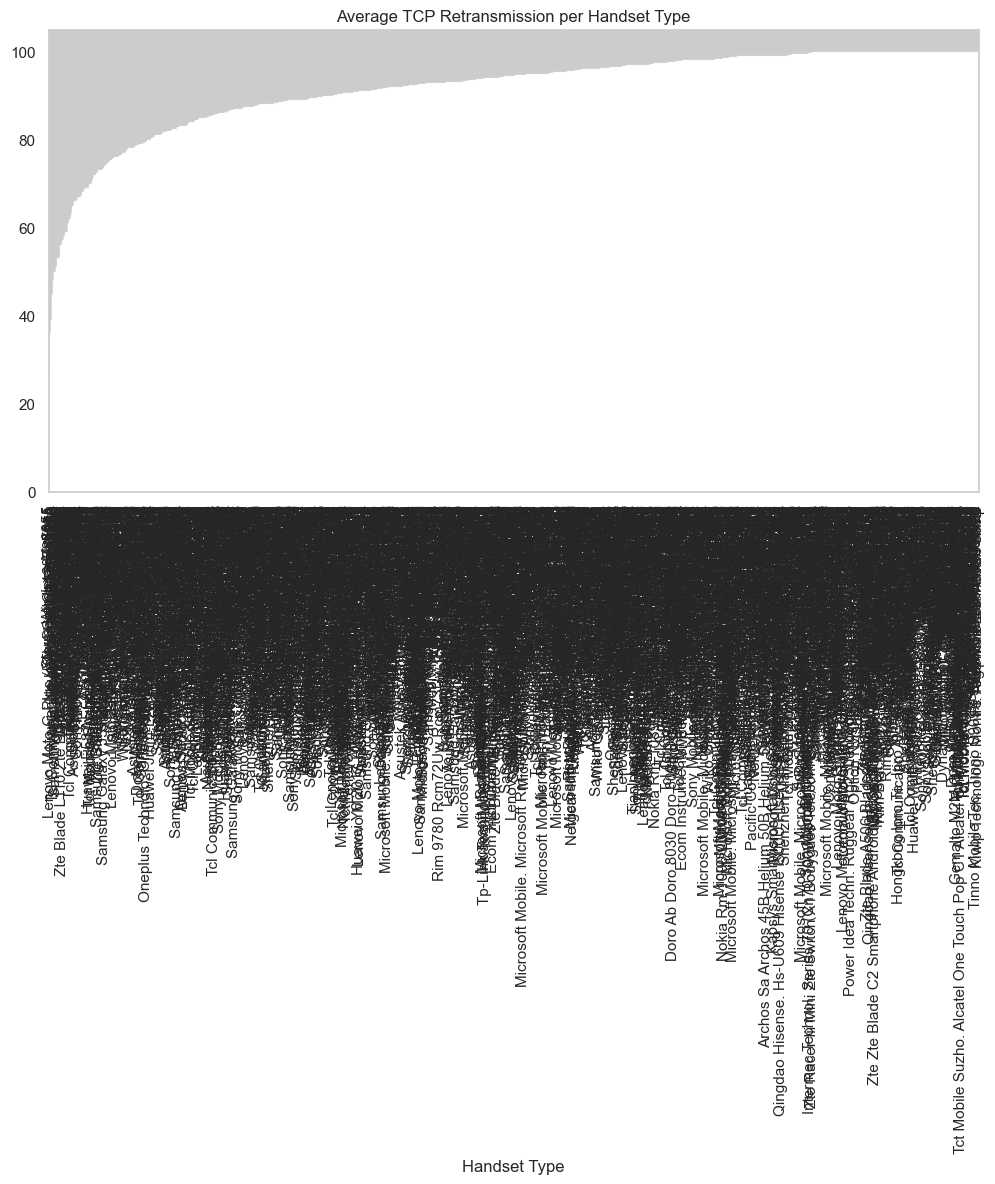

In [23]:
# Throughput per handset type
throughput_per_handset = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean().sort_values()
throughput_per_handset.plot(kind='bar', figsize=(12, 6), title='Average Throughput per Handset Type')
plt.show()

# TCP retransmission per handset type
tcp_per_handset = df.groupby('Handset Type')['DL TP < 50 Kbps (%)'].mean().sort_values()
tcp_per_handset.plot(kind='bar', figsize=(12, 6), title='Average TCP Retransmission per Handset Type')
plt.show()


In [24]:
# Step 1: Normalize data
experience_metrics = customer_aggregates[['Avg RTT', 'Avg Throughput']]
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(experience_metrics)

# Step 2: Run K-means
kmeans = KMeans(n_clusters=3, random_state=0)
customer_aggregates['Cluster'] = kmeans.fit_predict(scaled_metrics)

# Describe each cluster
for cluster in customer_aggregates['Cluster'].unique():
    print(f'Cluster {cluster}:')
    print(customer_aggregates[customer_aggregates['Cluster'] == cluster].describe())


Cluster 0:
       MSISDN/Number       Avg RTT  Avg Throughput  Cluster
count   8.789600e+04  87896.000000    87896.000000  87896.0
mean    4.758180e+10     68.469395     2155.387512      0.0
std     3.185853e+12    252.788222     3867.036279      0.0
min     3.360100e+10      0.000000        0.000000      0.0
25%     3.365053e+10     19.500000       43.500000      0.0
50%     3.366351e+10     32.500000       57.500000      0.0
75%     3.368310e+10     63.729294     2369.625000      0.0
max     8.823971e+14  16167.500000    16214.500000      0.0
Cluster 1:
       MSISDN/Number       Avg RTT  Avg Throughput  Cluster
count   1.845400e+04  18454.000000    18454.000000  18454.0
mean    3.367789e+10     51.516295    27623.161208      1.0
std     4.388087e+07     67.240595    12655.861993      0.0
min     3.360103e+10      8.750000    14811.750000      1.0
25%     3.365881e+10     26.000000    18737.875000      1.0
50%     3.366435e+10     40.000000    23899.928571      1.0
75%     3.368702e+